In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/regression-with-neural-networking/concrete_data.csv


# DATA

**The feature set includes:**
* Cement
* Blast Furnace Slag
* Fly Ash
* Water
* Super-plasticizer
* Coarse Aggregate
* Fine Aggregate
* Age

**The target set is:**
* Strength of the Cement

In [2]:
df = pd.read_csv('../input/regression-with-neural-networking/concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
features = ['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age']
target = ['Strength']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
print('Number of missing values in dataset:',df.isnull().sum().sum())

Number of missing values in dataset: 0


In [6]:
corrMatrix = df[df.columns[0:]].corr()['Strength'][:-1]
corrMatrix = corrMatrix.to_frame()

# DATA DISTRIBUTION

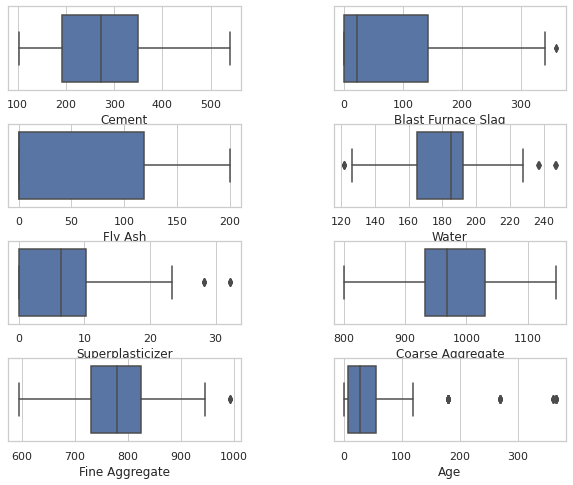

In [7]:
plt.figure(figsize =(10,8))
n = 0
sns.set(style="whitegrid")
for i in features:
    n += 1
    plt.subplot(4,2,n)
    plt.subplots_adjust(hspace = 0.4,wspace= 0.4)
    sns.boxplot(x = df[i])
plt.show()

There are a few outliers in our dataset

## OUTLIER ELIMINATION

In [8]:
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

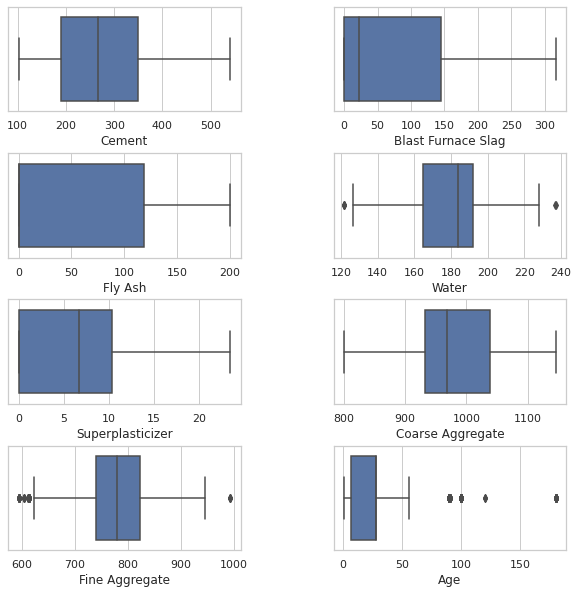

In [9]:
plt.figure(figsize =(10,10))
n = 0
sns.set(style="whitegrid")
for i in features:
    n += 1
    plt.subplot(4,2,n)
    plt.subplots_adjust(hspace = 0.4,wspace= 0.4)
    sns.boxplot(x = df[i])
plt.show()

# EDA

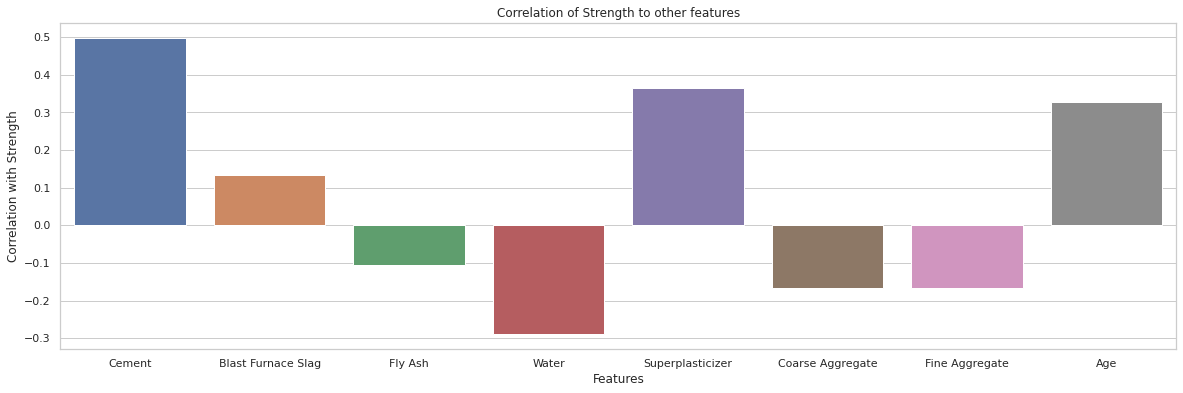

,Strength
Cement,0.497832
Blast Furnace Slag,0.134829
Fly Ash,-0.105755
Water,-0.289633
Superplasticizer,0.366079
Coarse Aggregate,-0.164935
Fine Aggregate,-0.167241
Age,0.328873


In [10]:
plt.figure(1,figsize =(20,6))
sns.set(style="whitegrid")
sns.barplot(x = corrMatrix.index,y = corrMatrix['Strength'],data = corrMatrix)
plt.title('Correlation of Strength to other features')
plt.ylabel('Correlation with Strength')
plt.xlabel('Features')
plt.show()
corrMatrix

It is clear from the graph that : 
* Cement
* Superplasticizer
* Age

Have a positive effect on the Concrete's Strength, while,

* Water has a large negative effect when compared to other negative factors

<Figure size 576x576 with 0 Axes>

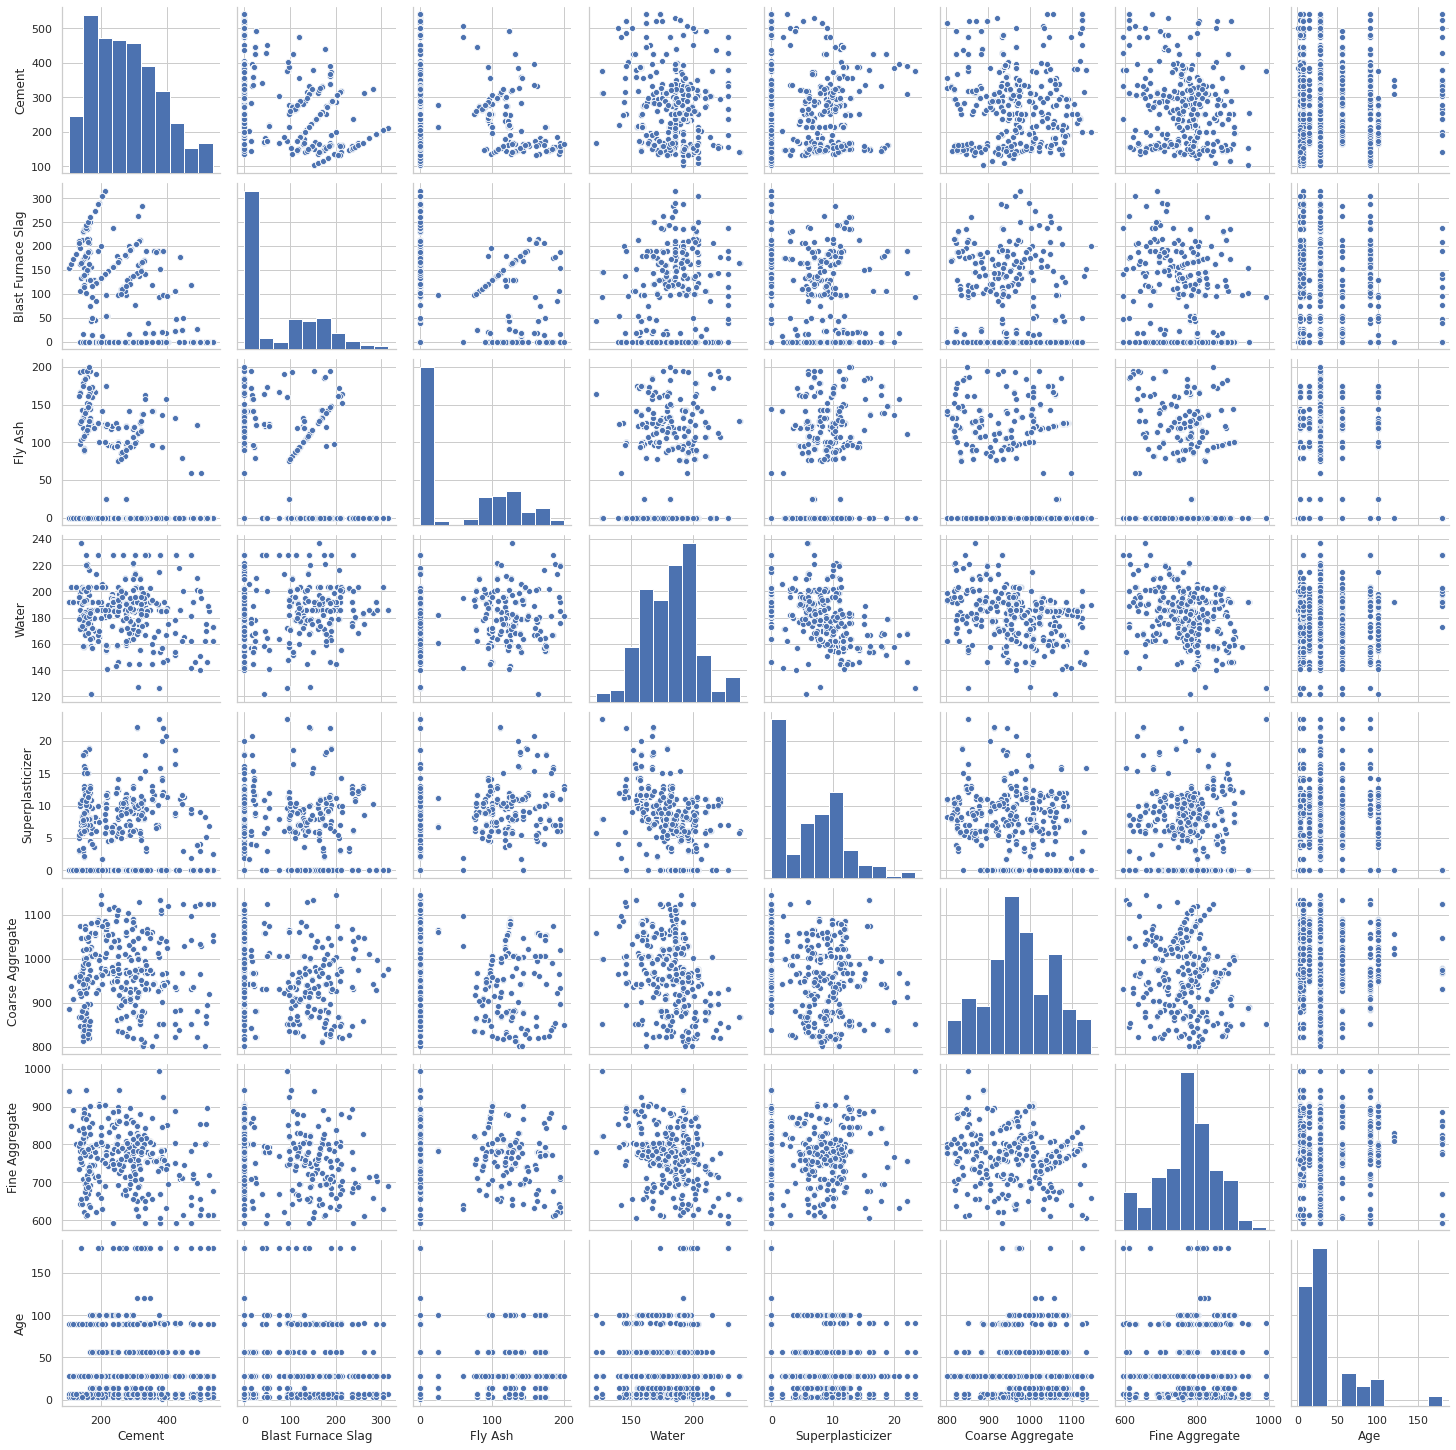

In [11]:
plt.figure(figsize=(8,8))
sns.pairplot(df[features],palette='coolwarm')
plt.show()

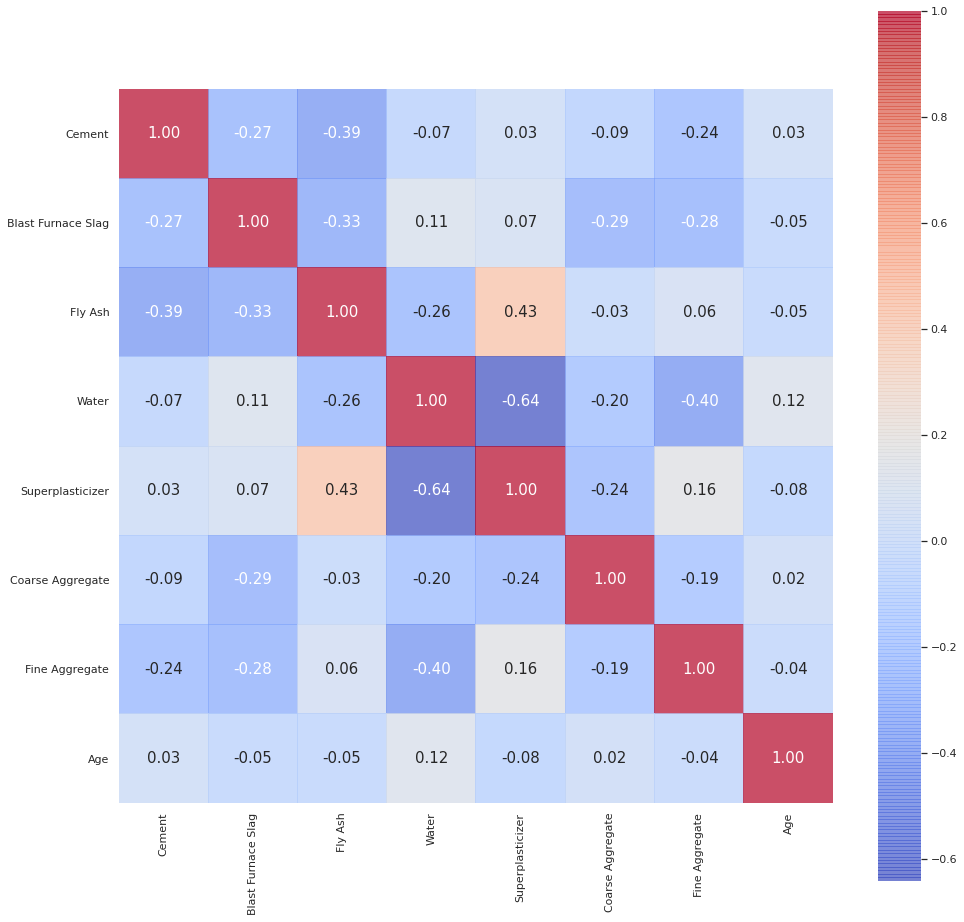

In [12]:
corr = df[features].corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features, yticklabels= features, alpha = 0.7,   cmap= 'coolwarm')
plt.show()

None of the variables are strongly correlated...hence PCA cannot be performed

In [13]:
# Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Separating out the features
X = df.loc[:, features].values
# Separating out the target
y = df.loc[:,target].values
# Standardizing the features
X = scaler.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X,y,test_size = 0.2,random_state = 7)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(784, 8) (197, 8) (784, 1) (197, 1)


In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [16]:
from sklearn.metrics import mean_absolute_error as mae
y_pred = lr.predict(X_test)
mae(y_test,y_pred)

7.241361866306934